In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
data, data_labels = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
labels = data_labels.to_numpy()

In [7]:
X = data.to_numpy()

In [8]:
#784 number of pixels in grid
pca = PCA(n_components=784)
pca.fit(X)
#pca.explained_variance_ratio_

PCA(n_components=784)

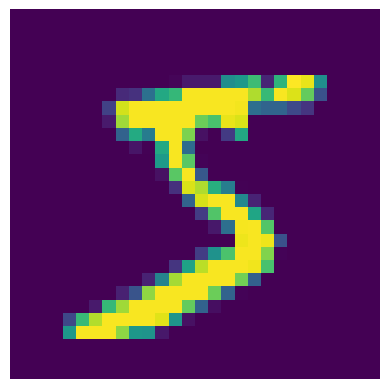

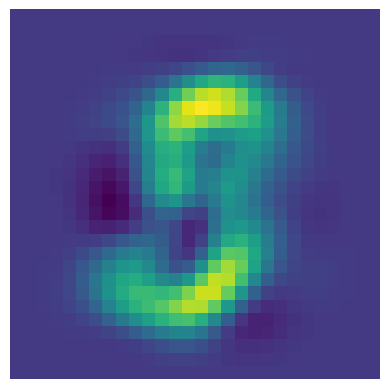

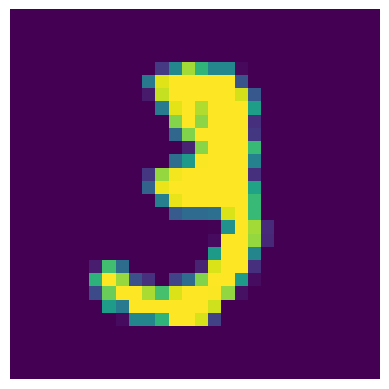

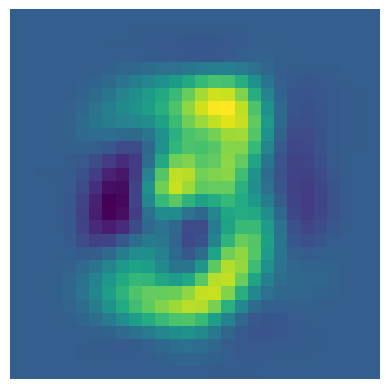

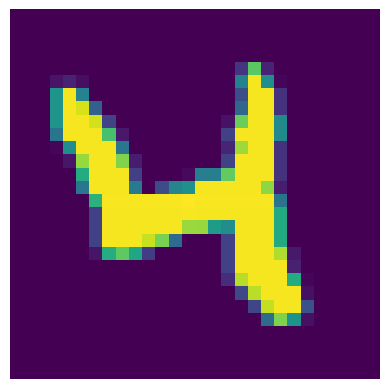

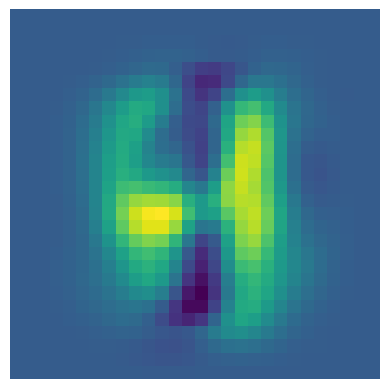

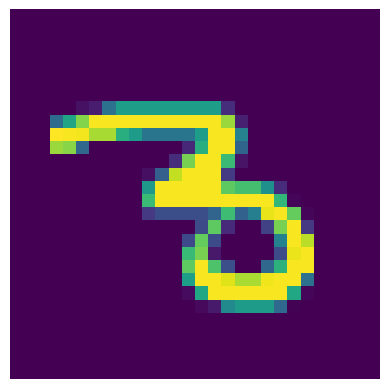

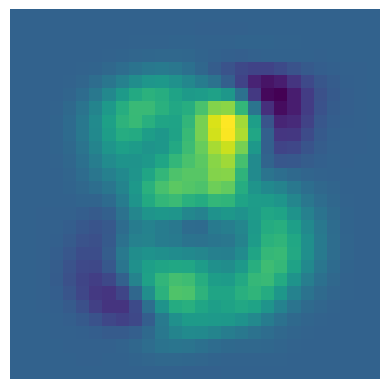

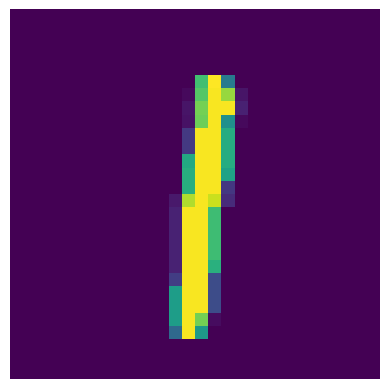

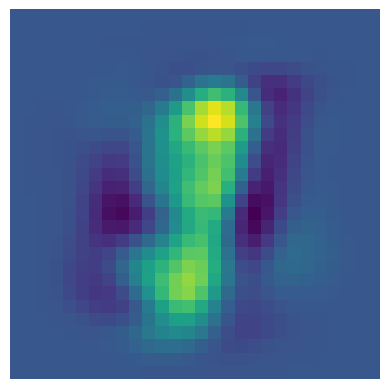

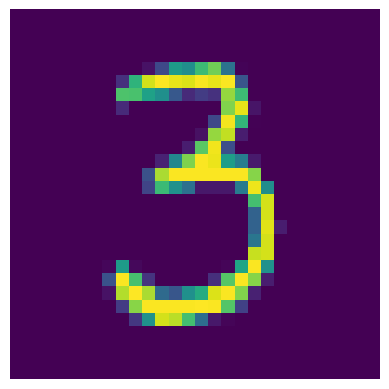

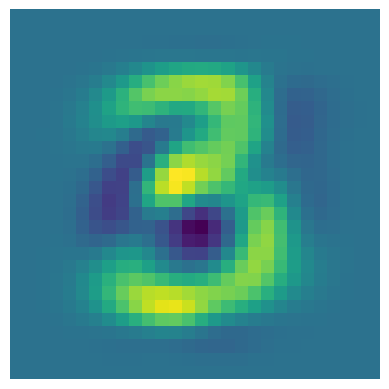

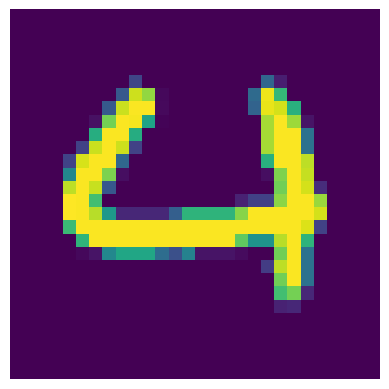

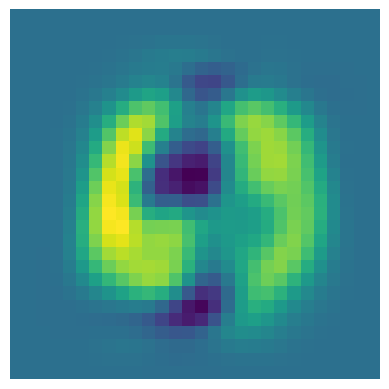

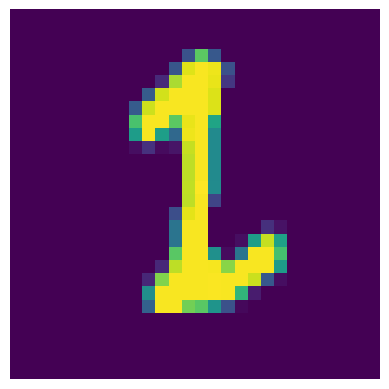

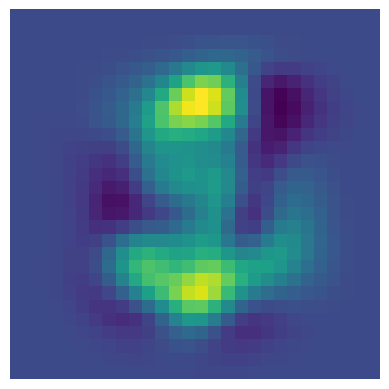

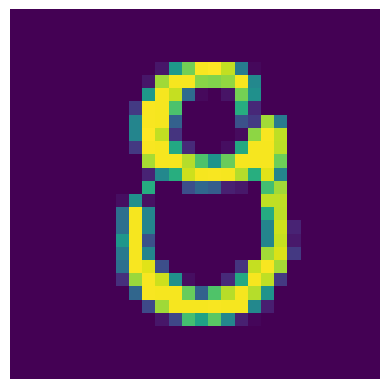

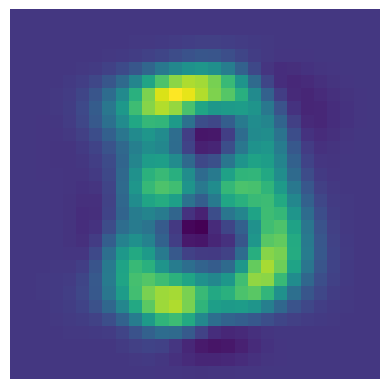

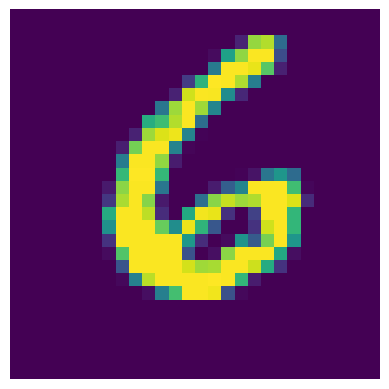

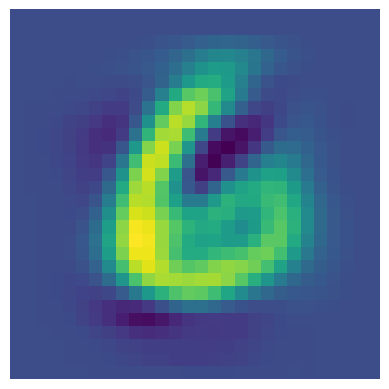

In [20]:
n = 28 #28 size of one dimension of grid
v = pca.components_.T

#projects sample on the first r principal axes
def project_sample(sample, v, r):
    projection = (sample@v[:, :r])@(v[:, :r].T)
    return projection

r = 10
for i in range(10):
    fig, ax = plt.subplots()
    ax.imshow(np.reshape(X[10*i],(n,n)))
    plt.axis('off')
    plt.savefig(f'relazione/immagini/number_sample{i}.png', dpi=400)
    fig, ax = plt.subplots()
    ax.imshow(np.reshape(project_sample(X[10*i], v, r),(n,n)))
    plt.axis('off')
    plt.savefig(f'relazione/immagini/number_rebuilt{i}.png', dpi=400)


In [10]:
np.sum(pca.explained_variance_ratio_[:10]*100)

48.91704420709696

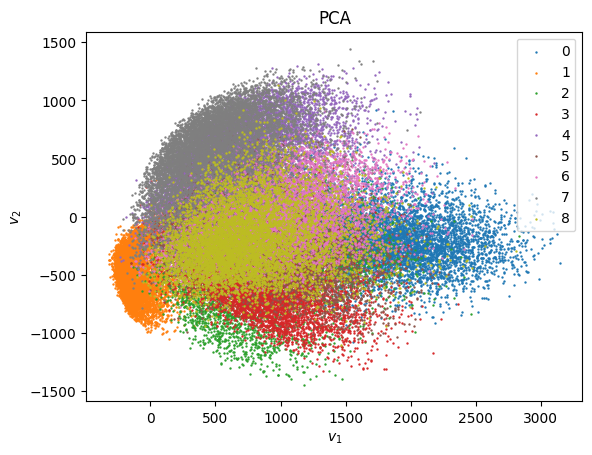

In [11]:
#getting component of projection over the first two principal axes
X_red = X@v[:,:2]

for i in range(9):
    #taking generate an array of bools corresponding to elements with label = 'i'
    bool_labels = (labels == str(i))

    #using boolean indexing to scatter plot samples labeled with digit 'i'
    X_red_labeled_i = X_red[bool_labels]

    plt.scatter(X_red_labeled_i[:,0],X_red_labeled_i[:,1],marker='o', s = 0.5, label = f'{i}')
plt.legend()
plt.xlabel(r'$v_1$')
plt.ylabel(r'$v_2$')
plt.title('PCA')
plt.savefig('relazione/immagini/pca_numbers.png')

TSNE

In [12]:
tsne = TSNE(n_components=2,perplexity=30.0)
y = tsne.fit_transform(X)

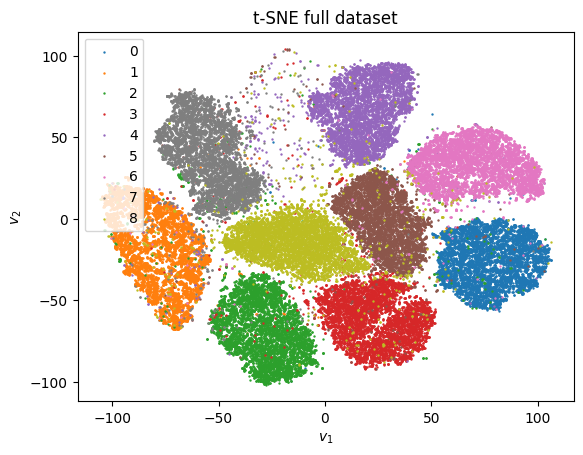

In [13]:
for i in range(9):
    #taking generate an array of bools corresponding to elements with label = 'i'
    bool_labels = (labels == str(i))

    #using boolean indexing to scatter plot samples labeled with digit 'i'
    y_labeled_i = y[bool_labels]

    plt.scatter(y_labeled_i[:,0],y_labeled_i[:,1],marker='o', s = 0.5, label = f'{i}')
plt.xlabel(r'$v_1$')
plt.ylabel(r'$v_2$')
plt.title('t-SNE full dataset')
plt.savefig('relazione/immagini/tsne_numbers.png')
plt.legend()

TSNE on reduced X (dim = 40)

In [14]:
X_red = X@v[:,:40]

In [15]:
tsne_red = TSNE(n_components=2,perplexity=60.0)
y_red = tsne.fit_transform(X_red)

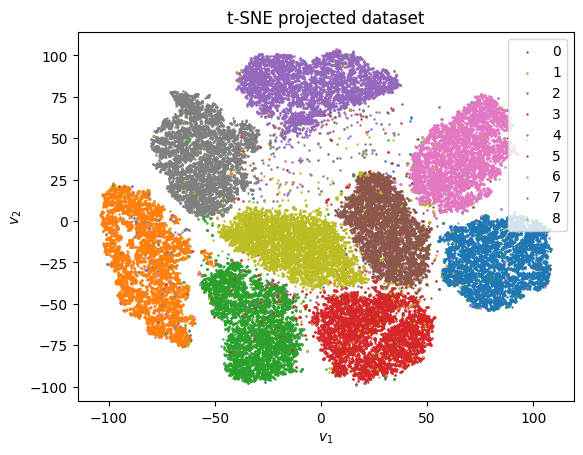

In [16]:
for i in range(9):
    #taking generate an array of bools corresponding to elements with label = 'i'
    bool_labels = (labels == str(i))

    #using boolean indexing to scatter plot samples labeled with digit 'i'
    y_red_labeled_i = y_red[bool_labels]

    plt.scatter(y_red_labeled_i[:,0],y_red_labeled_i[:,1],marker='o', s = 0.5, label = f'{i}')
plt.legend()
plt.xlabel(r'$v_1$')
plt.ylabel(r'$v_2$')
plt.title('t-SNE projected dataset')
plt.savefig('relazione/immagini/tsne_numbers_40.png')